# Introgressed Tracts

In [1]:
# Import packages.
import analysis_functions as af
import numpy as np
import pandas as pd
# Print version numbers.
print('numpy', np.__version__)
print('pandas', pd.__version__)

numpy 1.22.3
pandas 1.4.2


In [2]:
# Load the meta data file for the TGP.
tgp_df = pd.read_csv(
    '../meta_data/tgp_mod.txt', sep='\t',
    names=['IND', 'POP', 'SUPERPOP'],
)

## _MUC19_

In [3]:
# Load the hmmix output.
hmmix_muc19_df = pd.read_csv('../hmmix_tracts/tgp_hmmix_haplotype_tracts_muc19.csv.gz')
# Load the tract information for muc19.
muc19_tracts_df, _, _, muc19_tract_pos, muc19_tract_counts = af.load_region_tracts(
    hmmix_muc19_df, tgp_df[tgp_df['SUPERPOP'] != 'AFR']['POP'].unique(),
)
# Compile the introgressed tract frequencies.
spop_muc19_tract_freqs_df, pop_muc19_tract_freqs_df = af.compile_tgp_introgressed_tract_freqs(muc19_tracts_df, 'muc19')


    AMR vs Non-AMR Introgressed Tracts Summary


    Proportions Z-Test
    ------------------
    Population   Chromosomes   Tracts   Frequency
    ----------   -----------   ------   ---------
    AMR          694           127      0.1829971181556196
    Non-AMR      2992          260      0.08689839572192513

    Z-statistic: 7.44062075039723
    P-value:     5.0106633241400664e-14


    Fisher's Exact Test
    -------------------
    Contingency Table:
                        Introgressed   Non-Introgressed
                        Tracts         Tracts
                        -----------   ---------------
                   AMR| 127           567
               Non-AMR| 260           2732

    Odds Ratio: 2.353574820241487
    P-value:    2.1439079540250224e-12
    


In [4]:
# Show the introgressed tract frequency stratified by super population.
spop_muc19_tract_freqs_df

,Super Population,Total Number of Chromosomes,Number of Introgressed Tracts,Introgressed Tract Frequency,Mean Tract Length
0,AMR,694,127,0.182997,609692.913386
1,SAS,978,145,0.148262,266268.965517
2,EAS,1008,88,0.087302,349102.272727
3,EUR,1006,27,0.026839,467037.037037
4,AFR,1008,0,0.000000,NaN


In [5]:
# Show the introgressed tract frequency stratified by population.
pop_muc19_tract_freqs_df

,Super Population,Population,Total Number of Chromosomes,Number of Introgressed Tracts,Introgressed Tract Frequency,Mean Tract Length
0,AMR,MXL,128,39,0.304688,710666.666667
1,AMR,PEL,170,42,0.247059,574714.285714
2,AMR,CLM,188,23,0.122340,443304.347826
3,AMR,PUR,208,23,0.110577,668739.130435
4,SAS,BEB,172,34,0.197674,289941.176471
5,SAS,STU,204,33,0.161765,220878.787879
6,SAS,ITU,204,35,0.171569,227800.000000
7,SAS,PJL,192,18,0.093750,238277.777778
8,SAS,GIH,206,25,0.121359,368000.000000
9,EAS,CHB,206,11,0.053398,413454.545455


In [6]:
# For all tract overlap densities.
for overlap in np.arange(muc19_tracts_df.shape[0])[::-1]:
    # Determine the longest contiguos segment 
    start, end, tract_length = af.find_longest_contiguous_segments(
        muc19_tract_pos, muc19_tract_counts, overlap,
    )
    # If its greater than 40_000.
    if tract_length >= 40_000:
        # Stop searching.
        break
# Print the resulst.
print(f'{start}-{end}; {end-start}bp; {overlap}/{muc19_tracts_df.shape[0]} = {overlap/muc19_tracts_df.shape[0]}')

40759001-40831001; 72000bp; 295/387 = 0.7622739018087855


In [7]:
# Show the length of the longest tract found in mxl.
muc19_tracts_df[muc19_tracts_df['POP'] == 'MXL'].head(1)

,IND,SUPERPOP,POP,START,END,LENGTH
5,NA19725-hap2,AMR,MXL,40272001,41014001,742000


In [8]:
# For every focal region.
for region, rec_rate, region_lab in [
    (72_000, 1.033940787320553e-08, '72kb'), (742_000, 5.999665348061085e-09, '742kb')
]:
    # Compute the expected length and the probability of ILS.
    print(f'#***# {region_lab} Region #***# ')
    af.calc_prob_ils(rec_rate, region)

#***# 72kb Region #***# 
E[L | r] = 5099.641427621296
Pr(ILS | m) = 5e-324
#***# 742kb Region #***# 
E[L | r] = 8788.368961997625
Pr(ILS | m) = 5e-324


## Short-Read Repeat Region

In [9]:
# Load the hmmix output.
hmmix_chr12_df = pd.read_csv('../hmmix_tracts/tgp_hmmix_haplotype_tracts_chr12.csv.gz')
# Load the tract information for muc19.
sr_rr_tracts_df, _, _, sr_rr_tract_pos, sr_rr_tract_counts = af.load_region_tracts(
    af.tract_any_overlap(hmmix_chr12_df, 40876395, 40885001), tgp_df[tgp_df['SUPERPOP'] != 'AFR']['POP'].unique(),
)
# Compile the introgressed tract frequencies.
spop_sr_rr_tract_freqs_df, pop_sr_rr_tract_freqs_df = af.compile_tgp_introgressed_tract_freqs(
    sr_rr_tracts_df, 'short_read_repeat_region',
)


    AMR vs Non-AMR Introgressed Tracts Summary


    Proportions Z-Test
    ------------------
    Population   Chromosomes   Tracts   Frequency
    ----------   -----------   ------   ---------
    AMR          694           109      0.15706051873198848
    Non-AMR      2992          91      0.030414438502673797

    Z-statistic: 13.269399169414742
    P-value:     1.741813110299671e-40


    Fisher's Exact Test
    -------------------
    Contingency Table:
                        Introgressed   Non-Introgressed
                        Tracts         Tracts
                        -----------   ---------------
                   AMR| 109           585
               Non-AMR| 91           2901

    Odds Ratio: 5.939870386024232
    P-value:    1.952720870851557e-31
    


In [10]:
# Show the introgressed tract frequency stratified by super population.
spop_sr_rr_tract_freqs_df

,Super Population,Total Number of Chromosomes,Number of Introgressed Tracts,Introgressed Tract Frequency,Mean Tract Length
0,AMR,694,109,0.157061,547954.128440
1,SAS,978,27,0.027607,283666.666667
2,EAS,1008,58,0.057540,335327.586207
3,EUR,1006,6,0.005964,460500.000000
4,AFR,1008,0,0.000000,NaN


In [11]:
# Show the introgressed tract frequency stratified by population.
pop_sr_rr_tract_freqs_df

,Super Population,Population,Total Number of Chromosomes,Number of Introgressed Tracts,Introgressed Tract Frequency,Mean Tract Length
0,AMR,MXL,128,36,0.281250,653250.000000
1,AMR,PEL,170,38,0.223529,511368.421053
2,AMR,CLM,188,18,0.095745,381166.666667
3,AMR,PUR,208,17,0.081731,583352.941176
4,SAS,BEB,172,4,0.023256,427750.000000
5,SAS,STU,204,3,0.014706,136333.333333
6,SAS,ITU,204,8,0.039216,271250.000000
7,SAS,PJL,192,7,0.036458,223142.857143
8,SAS,GIH,206,5,0.024272,361400.000000
9,EAS,CHB,206,9,0.043689,363666.666667


## Plots

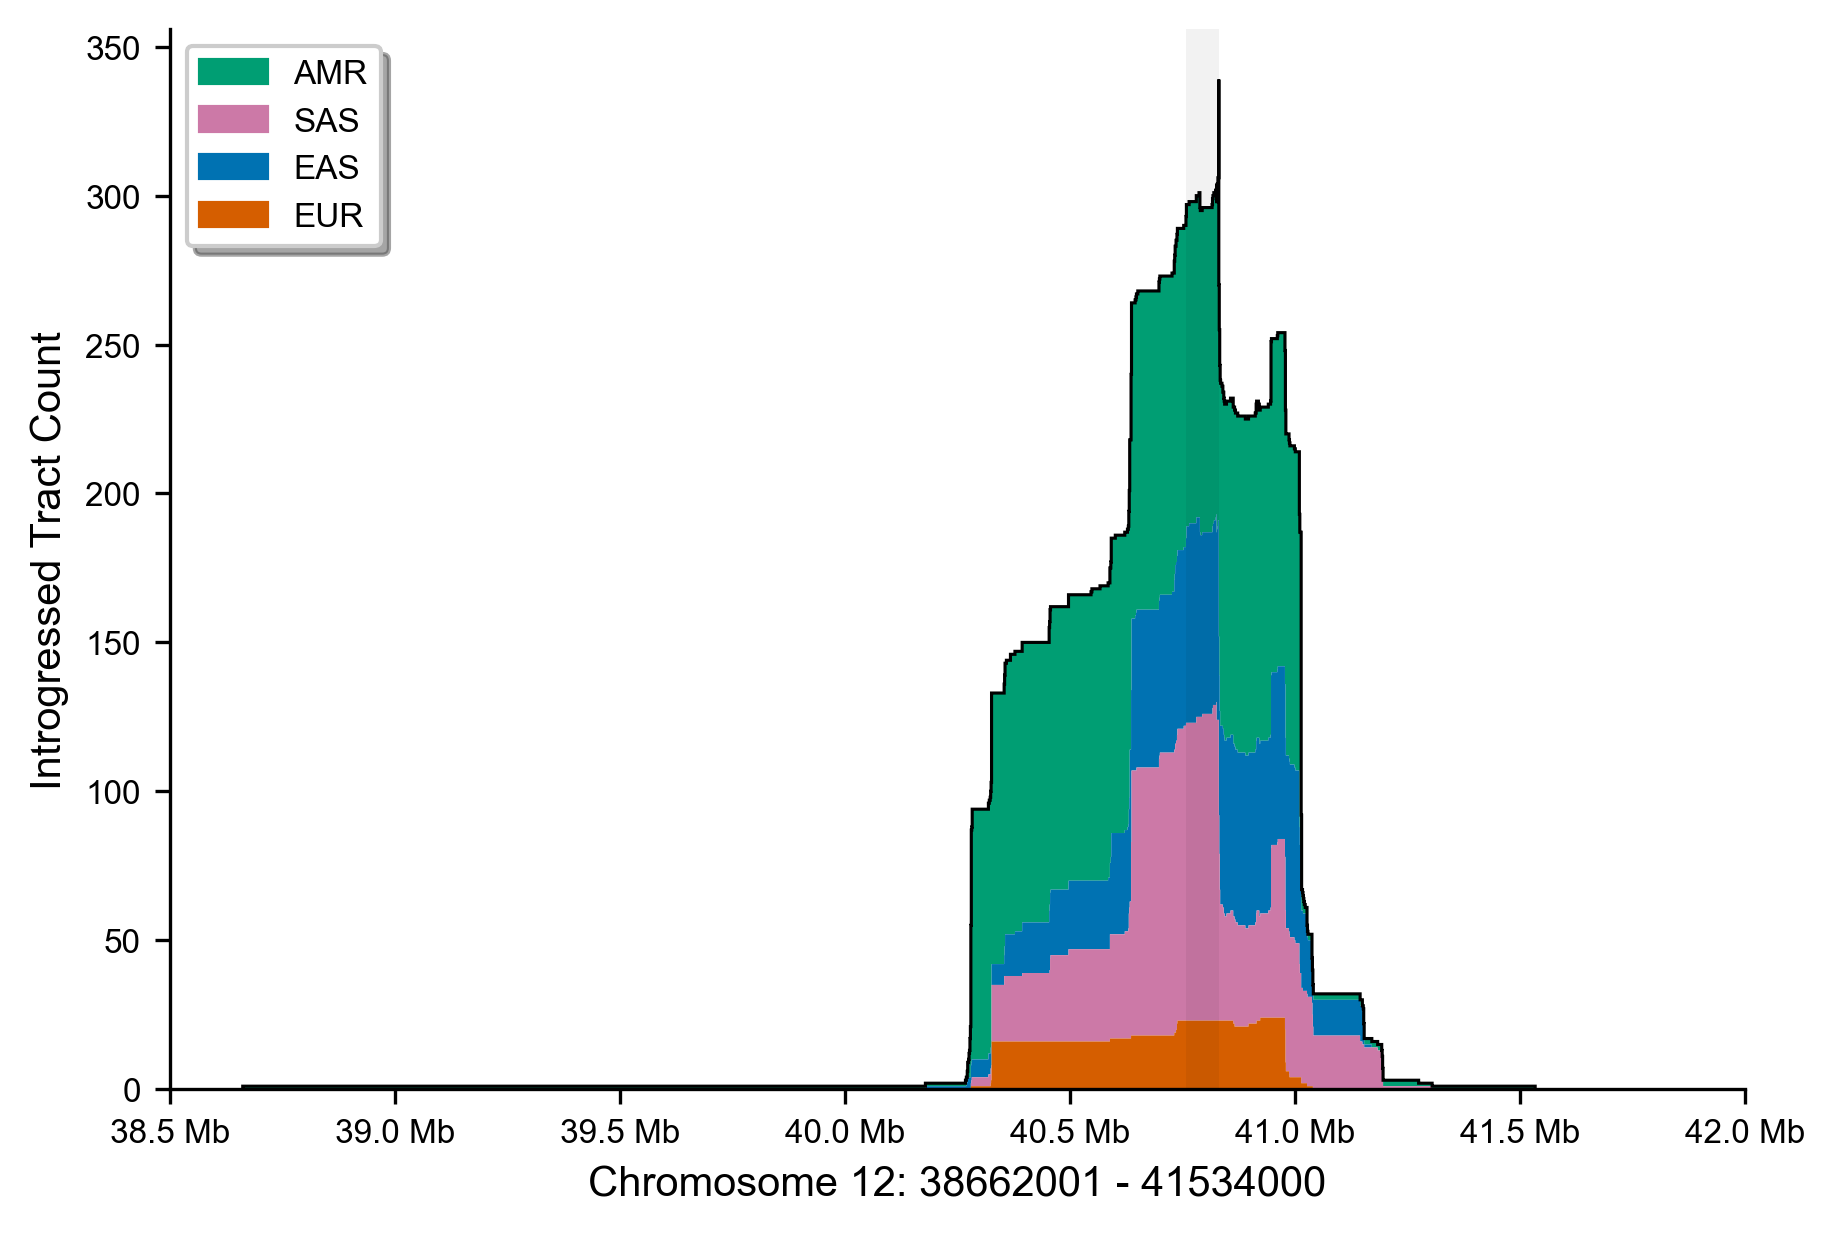

In [12]:
# Plot the muc19 introgressed tract denisty for the tgp.
af.plot_tgp_muc19_tract_density(muc19_tracts_df, muc19_tract_pos, muc19_tract_counts)

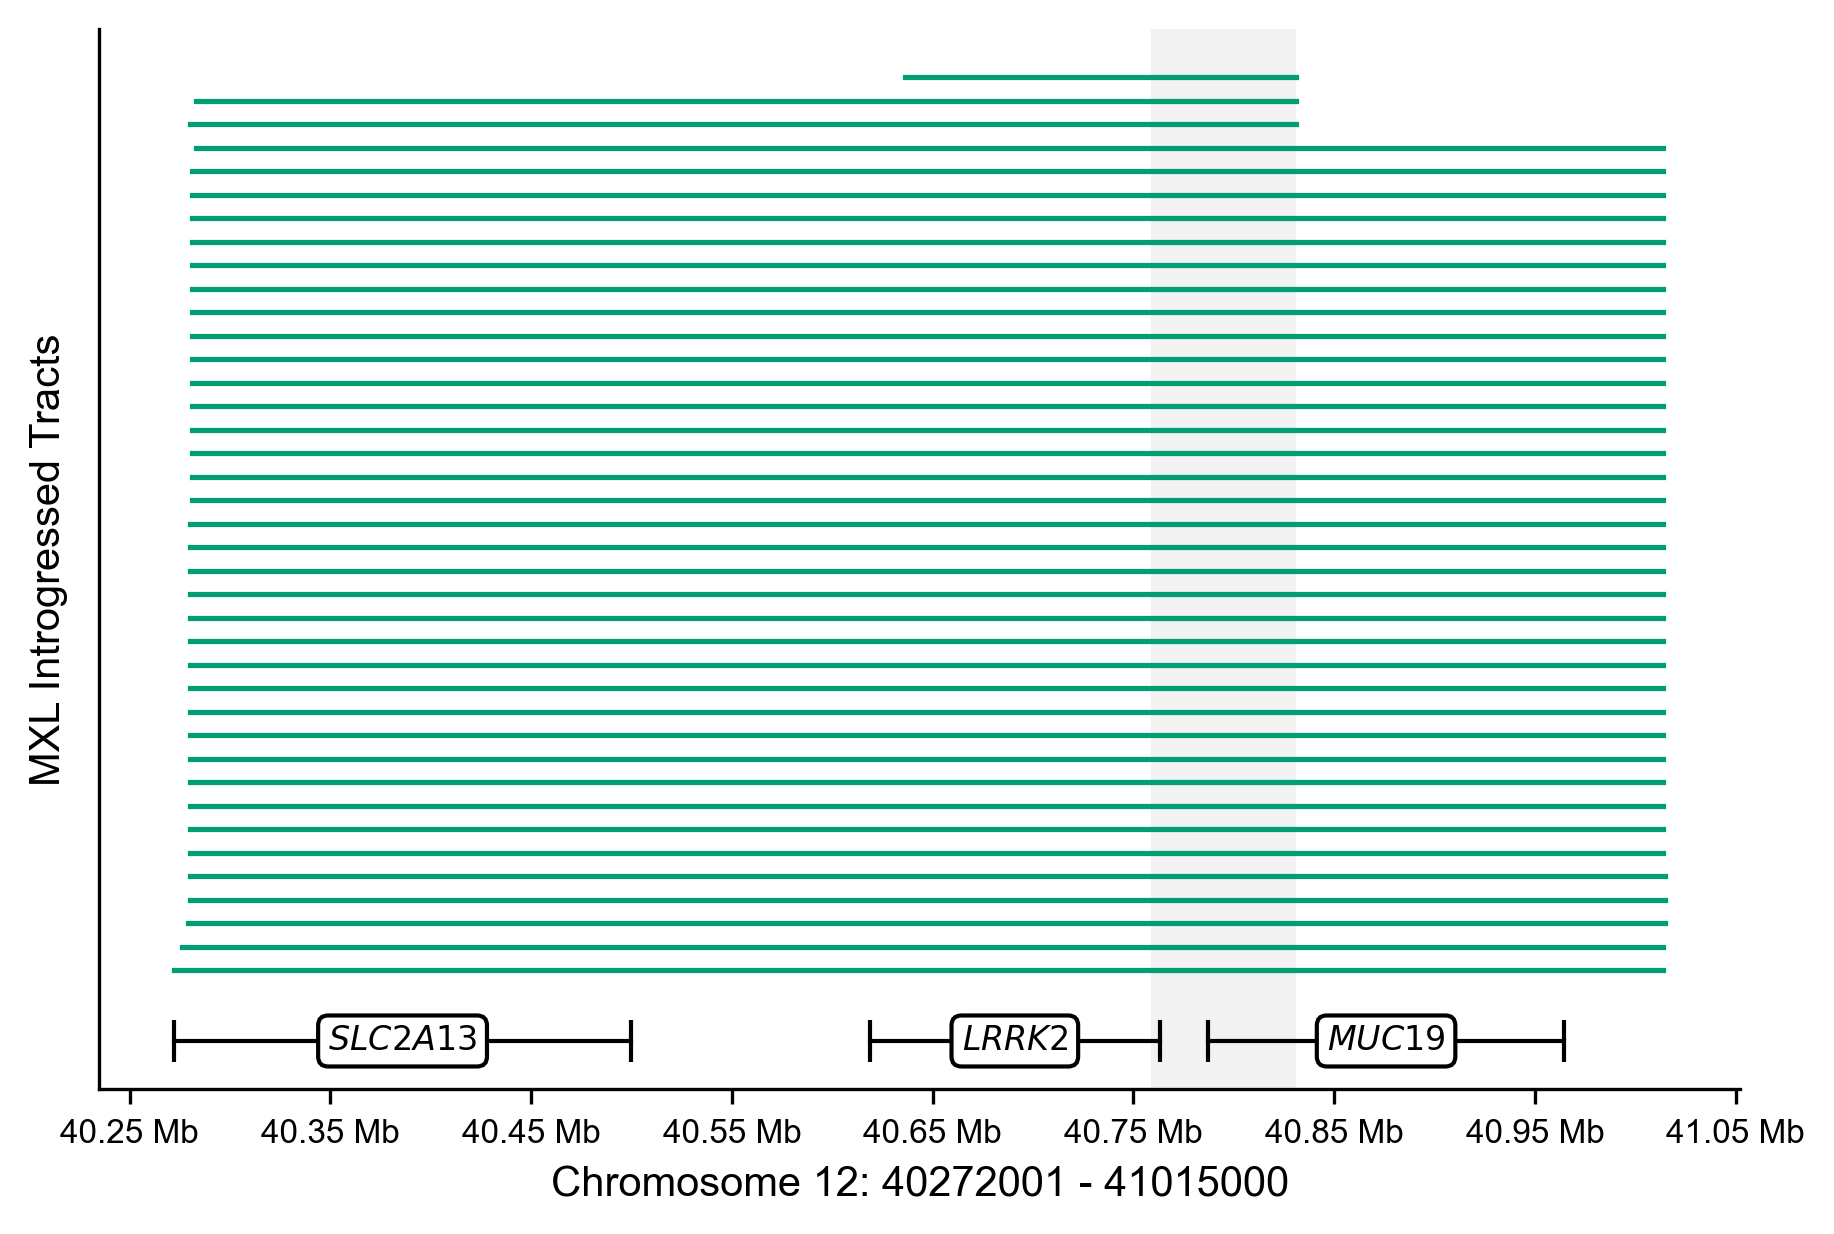

In [13]:
# Plot the muc19 introgressed tracts for mxl.
af.plot_mxl_muc19_tracts(muc19_tracts_df)

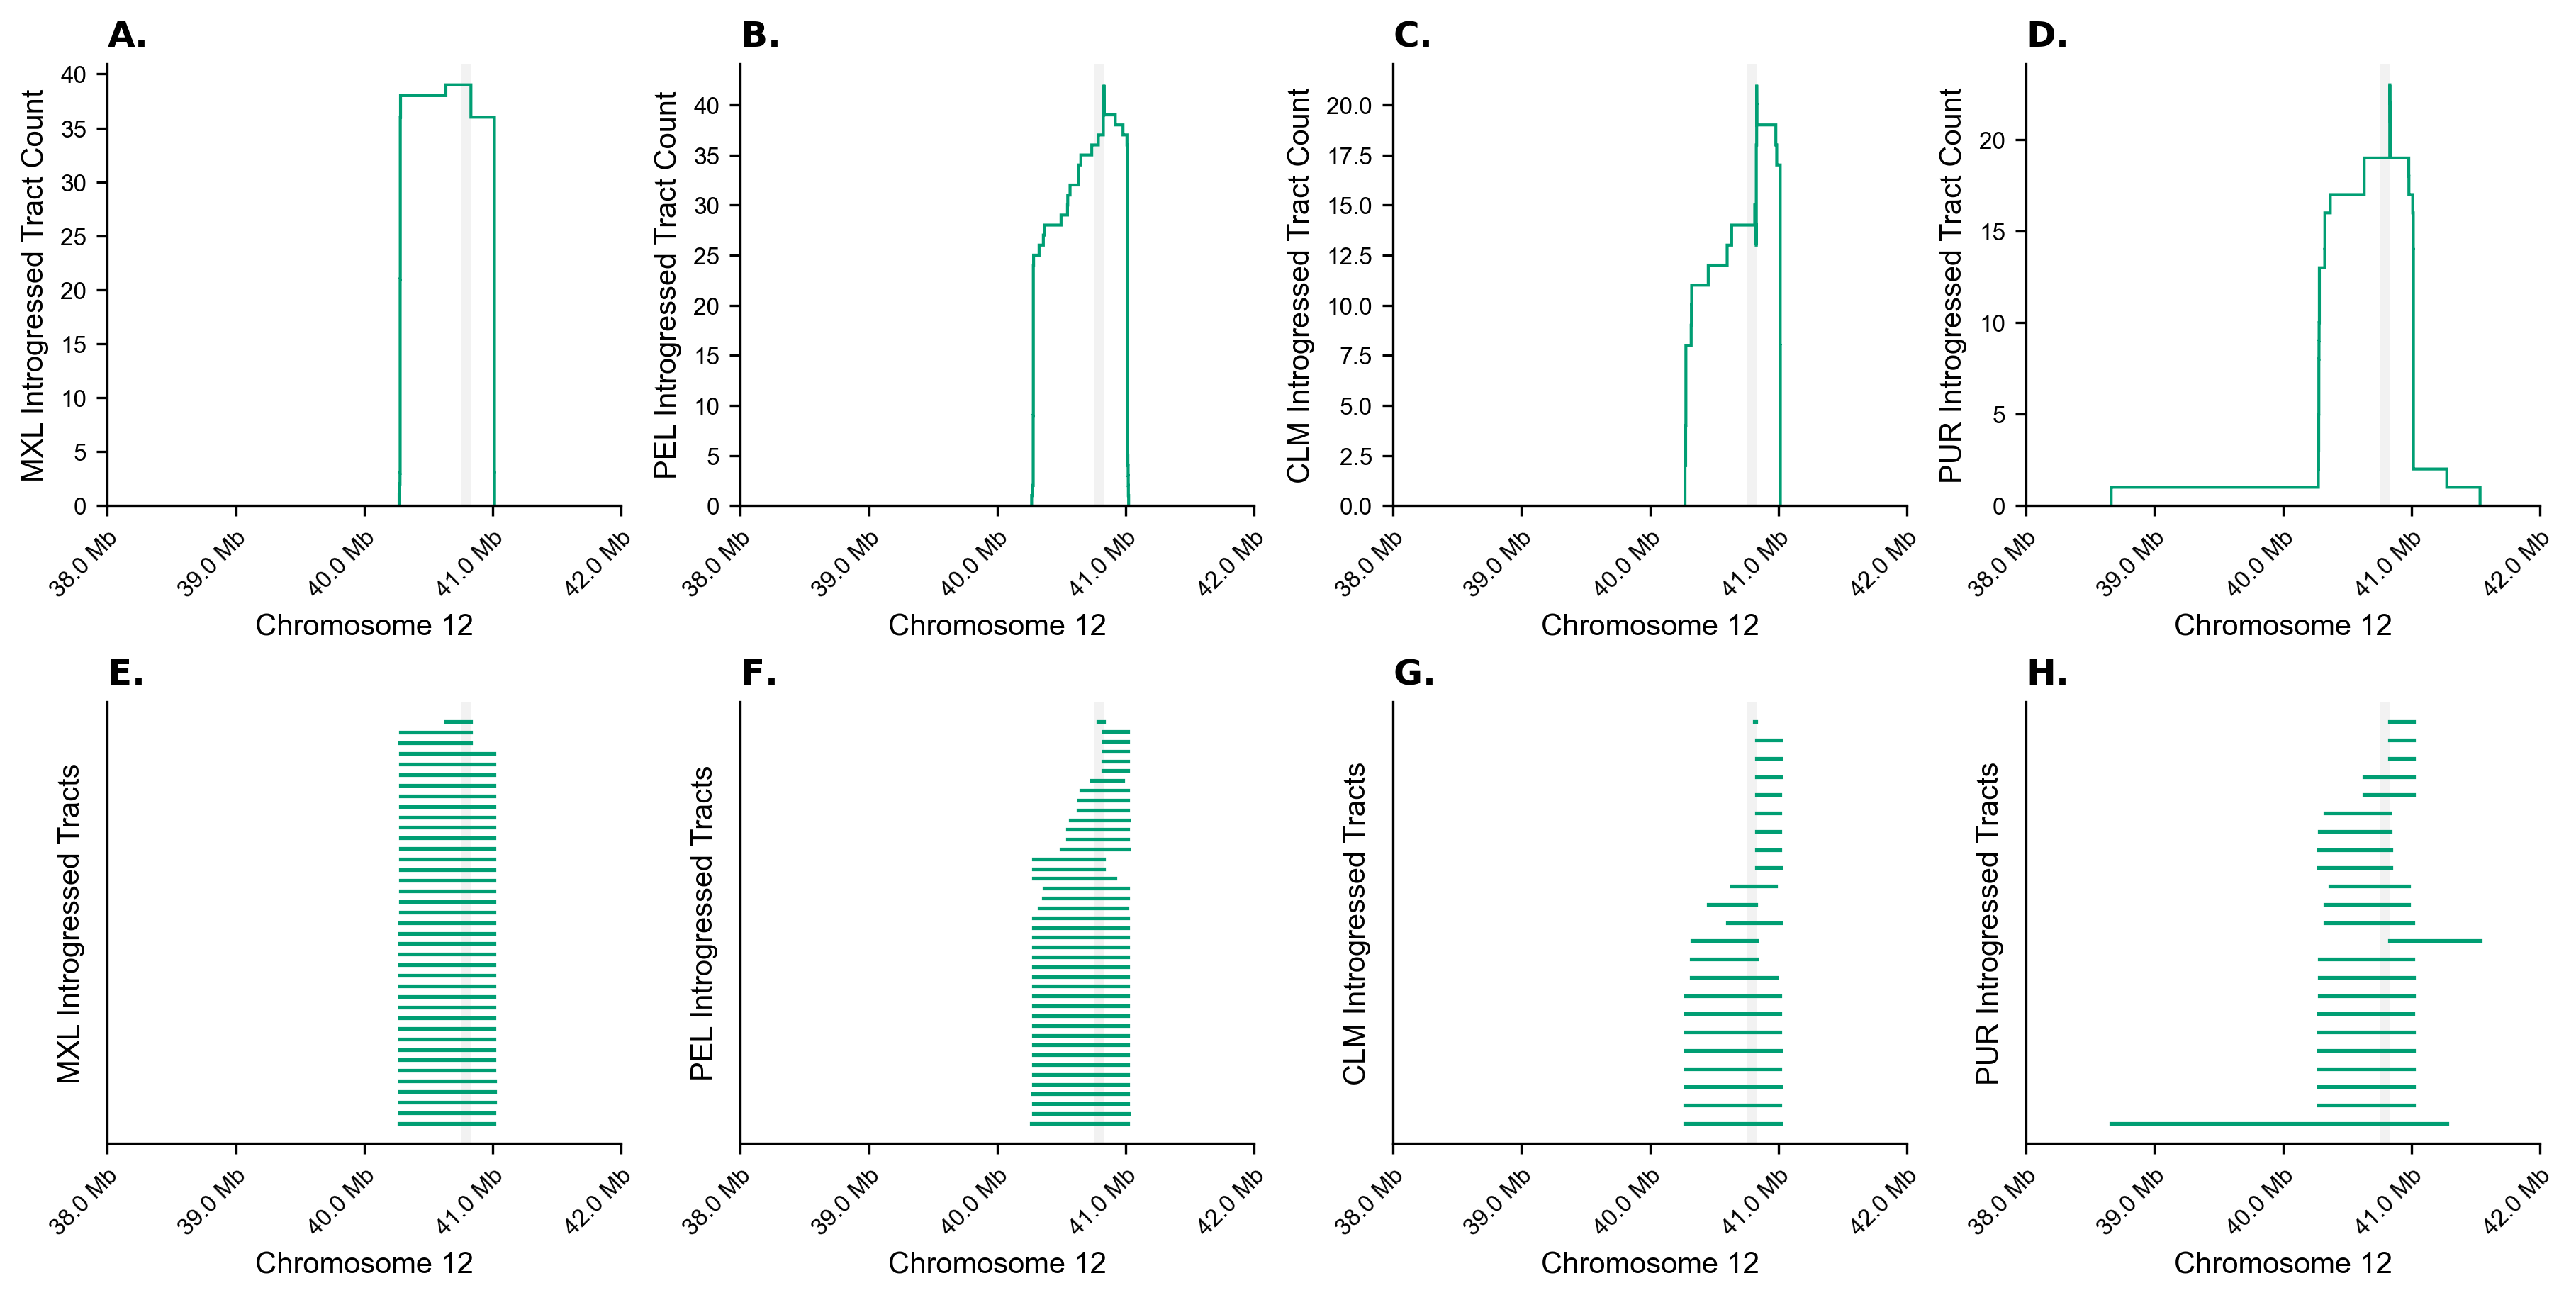

In [14]:
# Plot the muc19 introgressed tract info for amr populations.
af.plot_tract_info_per_super_population(muc19_tracts_df, 'AMR')

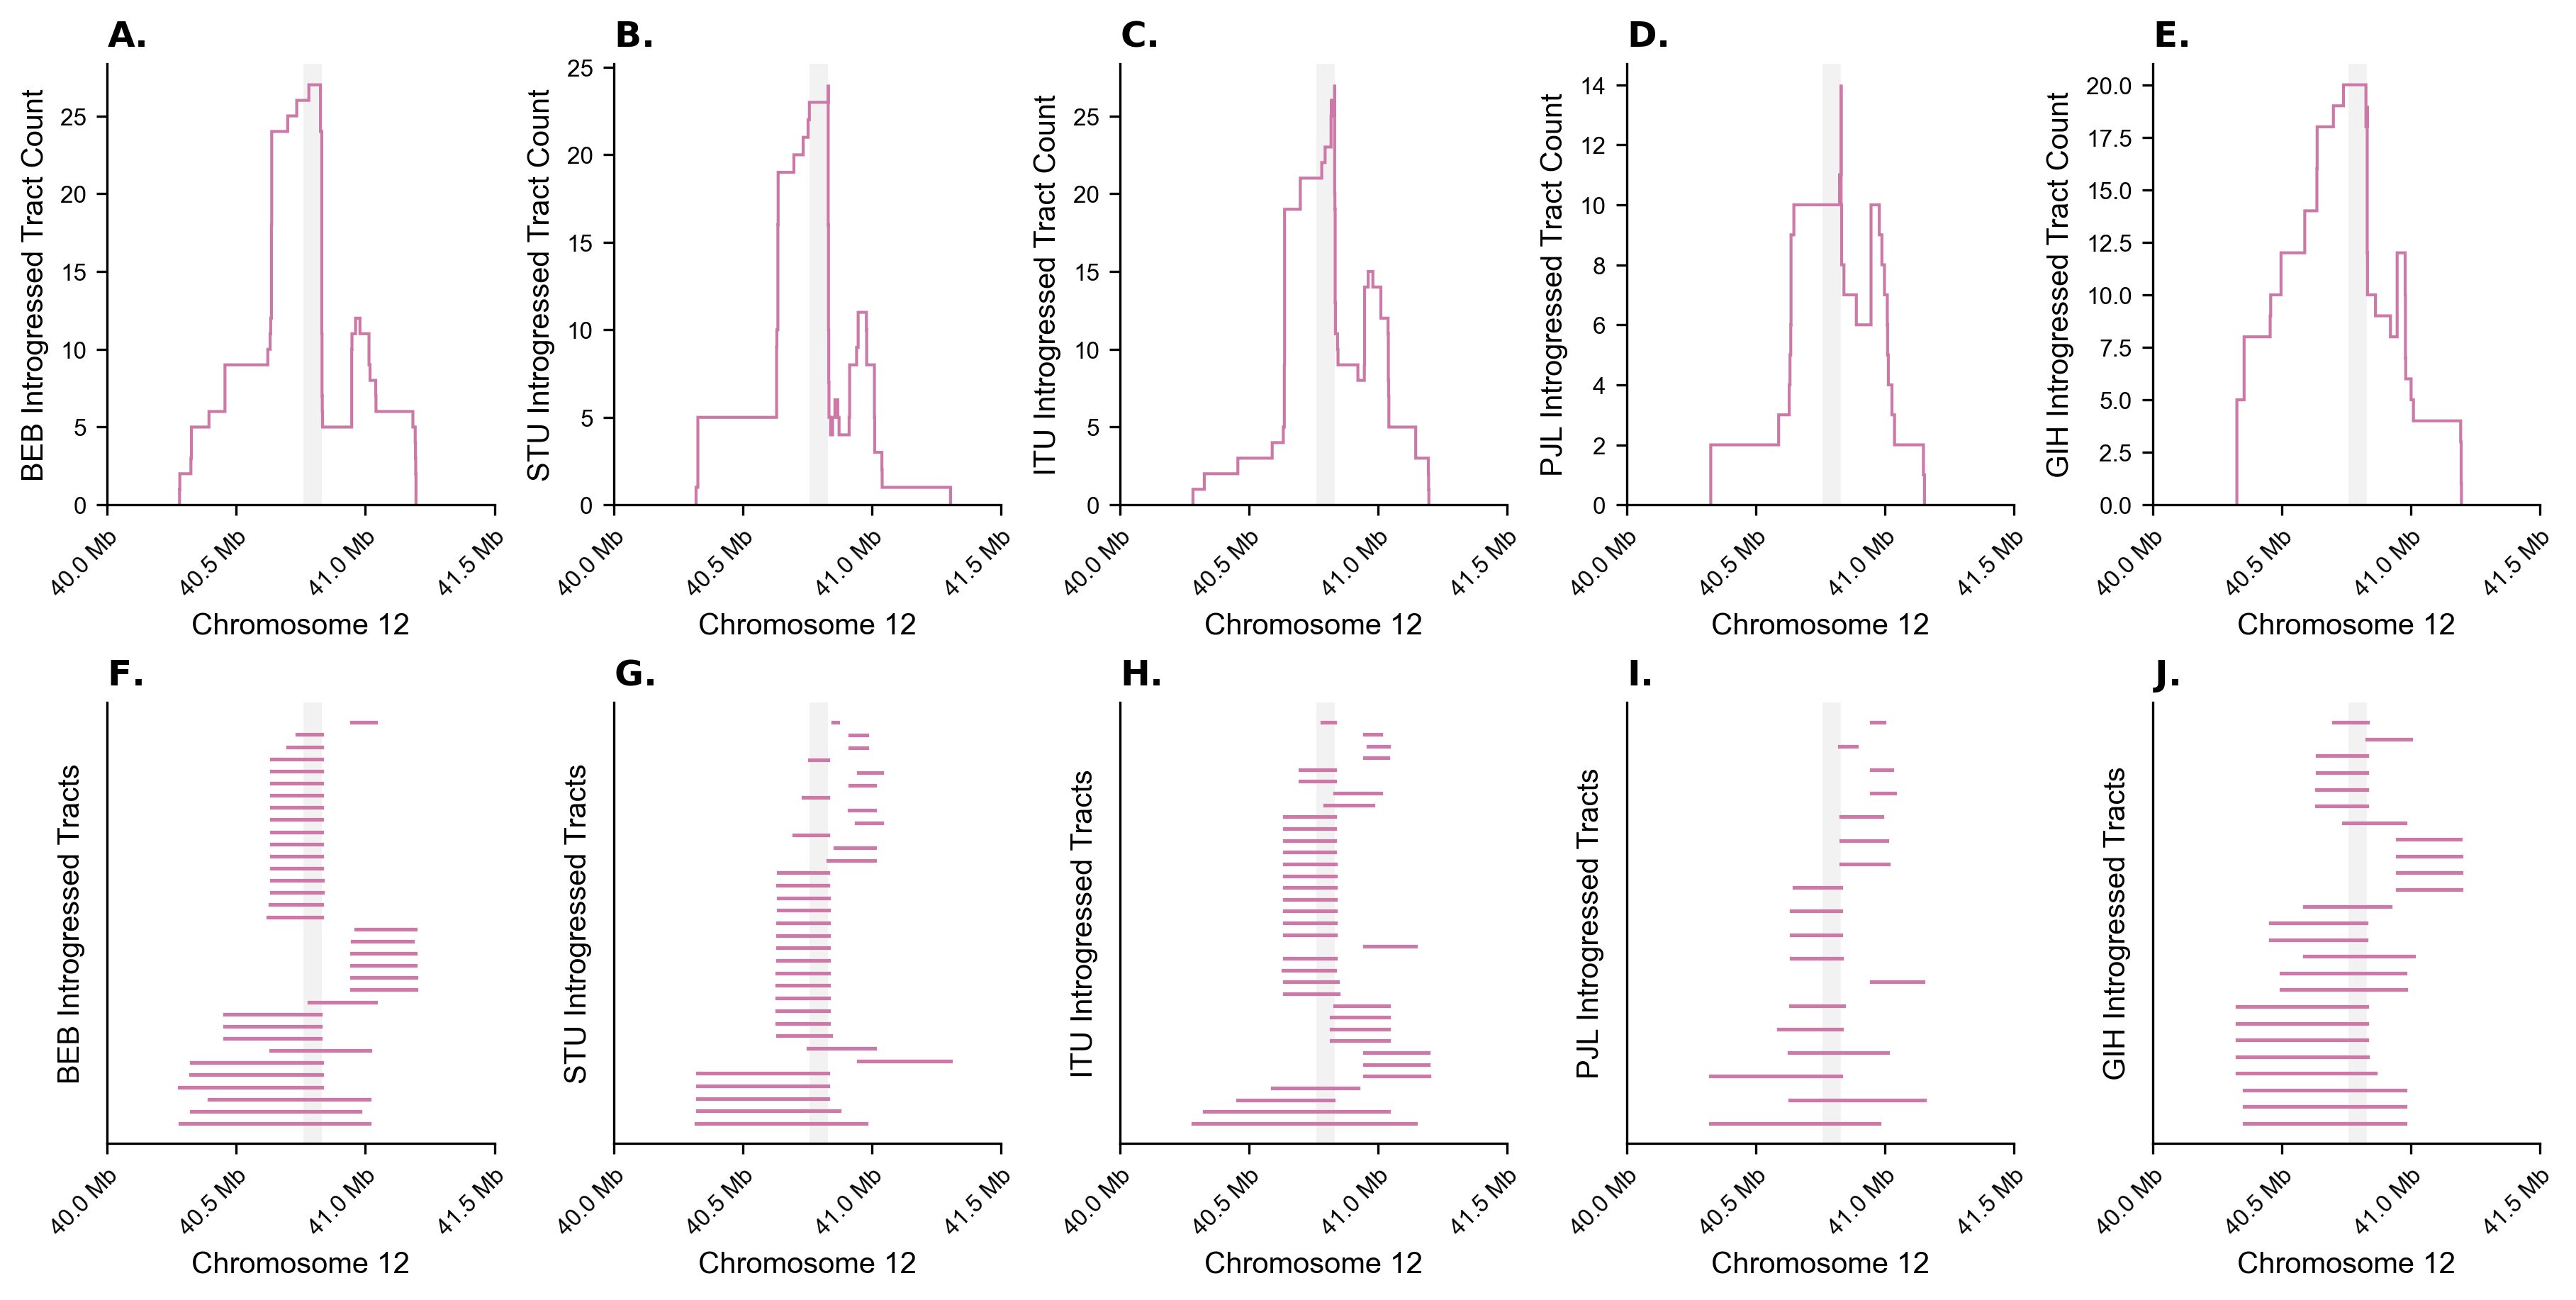

In [15]:
# Plot the muc19 introgressed tract info for sas populations.
af.plot_tract_info_per_super_population(muc19_tracts_df, 'SAS')

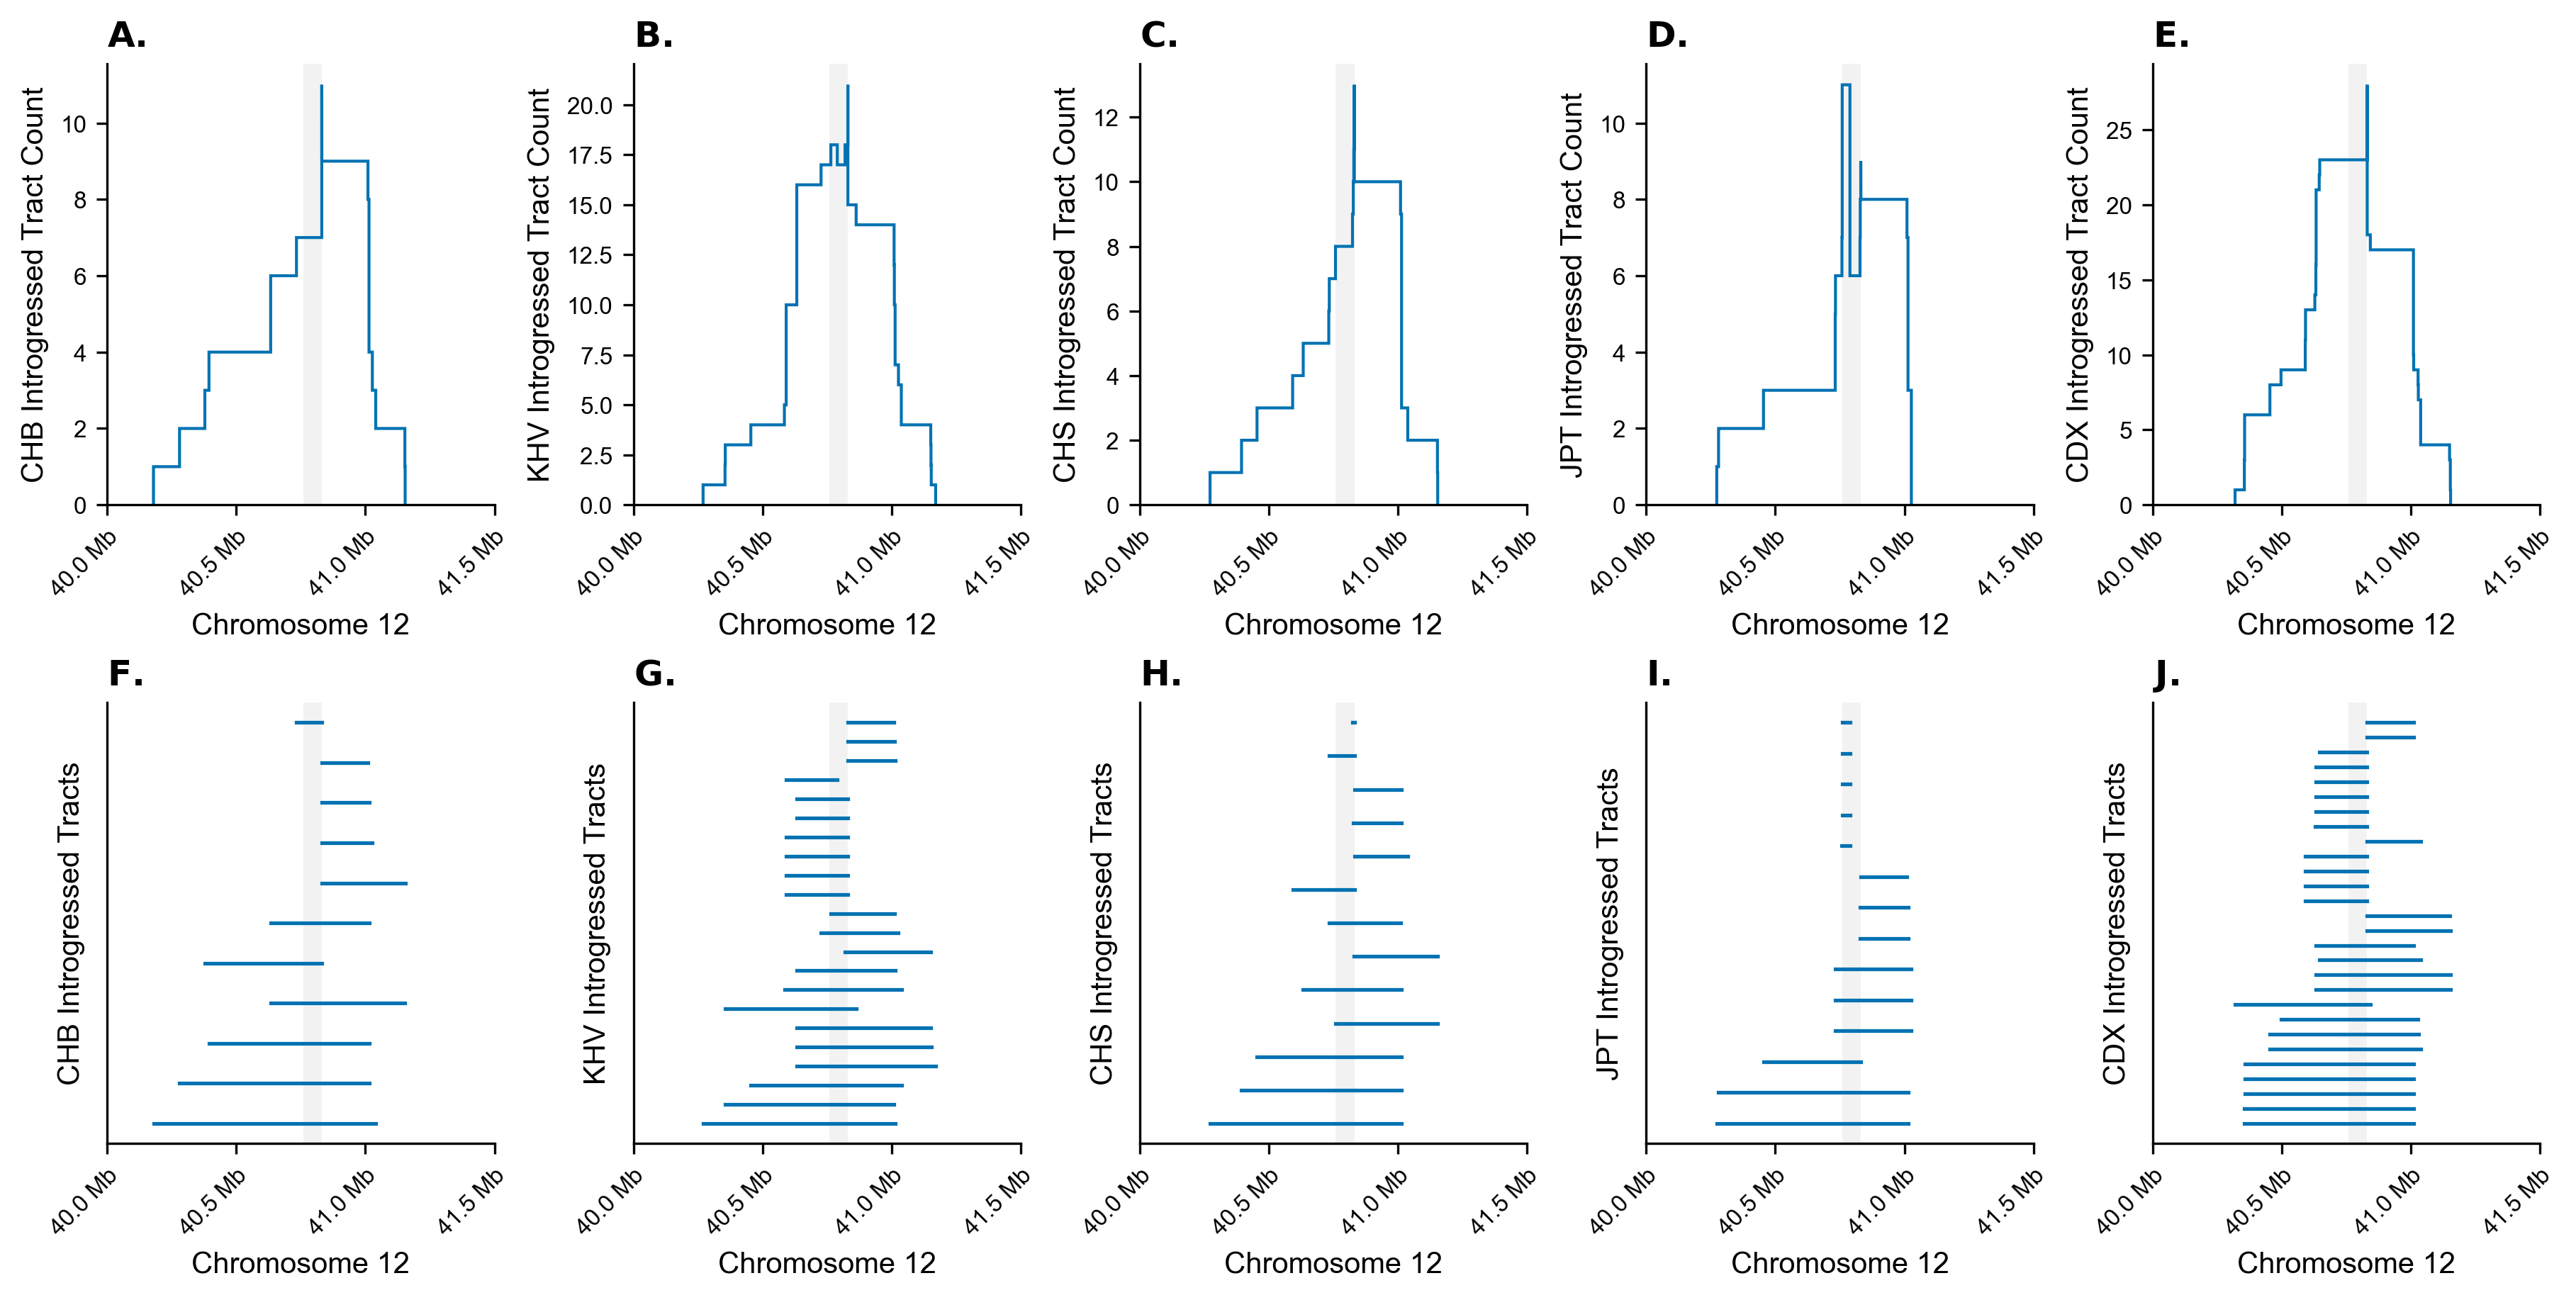

In [16]:
# Plot the muc19 introgressed tract infor fo eas populations.
af.plot_tract_info_per_super_population(muc19_tracts_df, 'EAS')

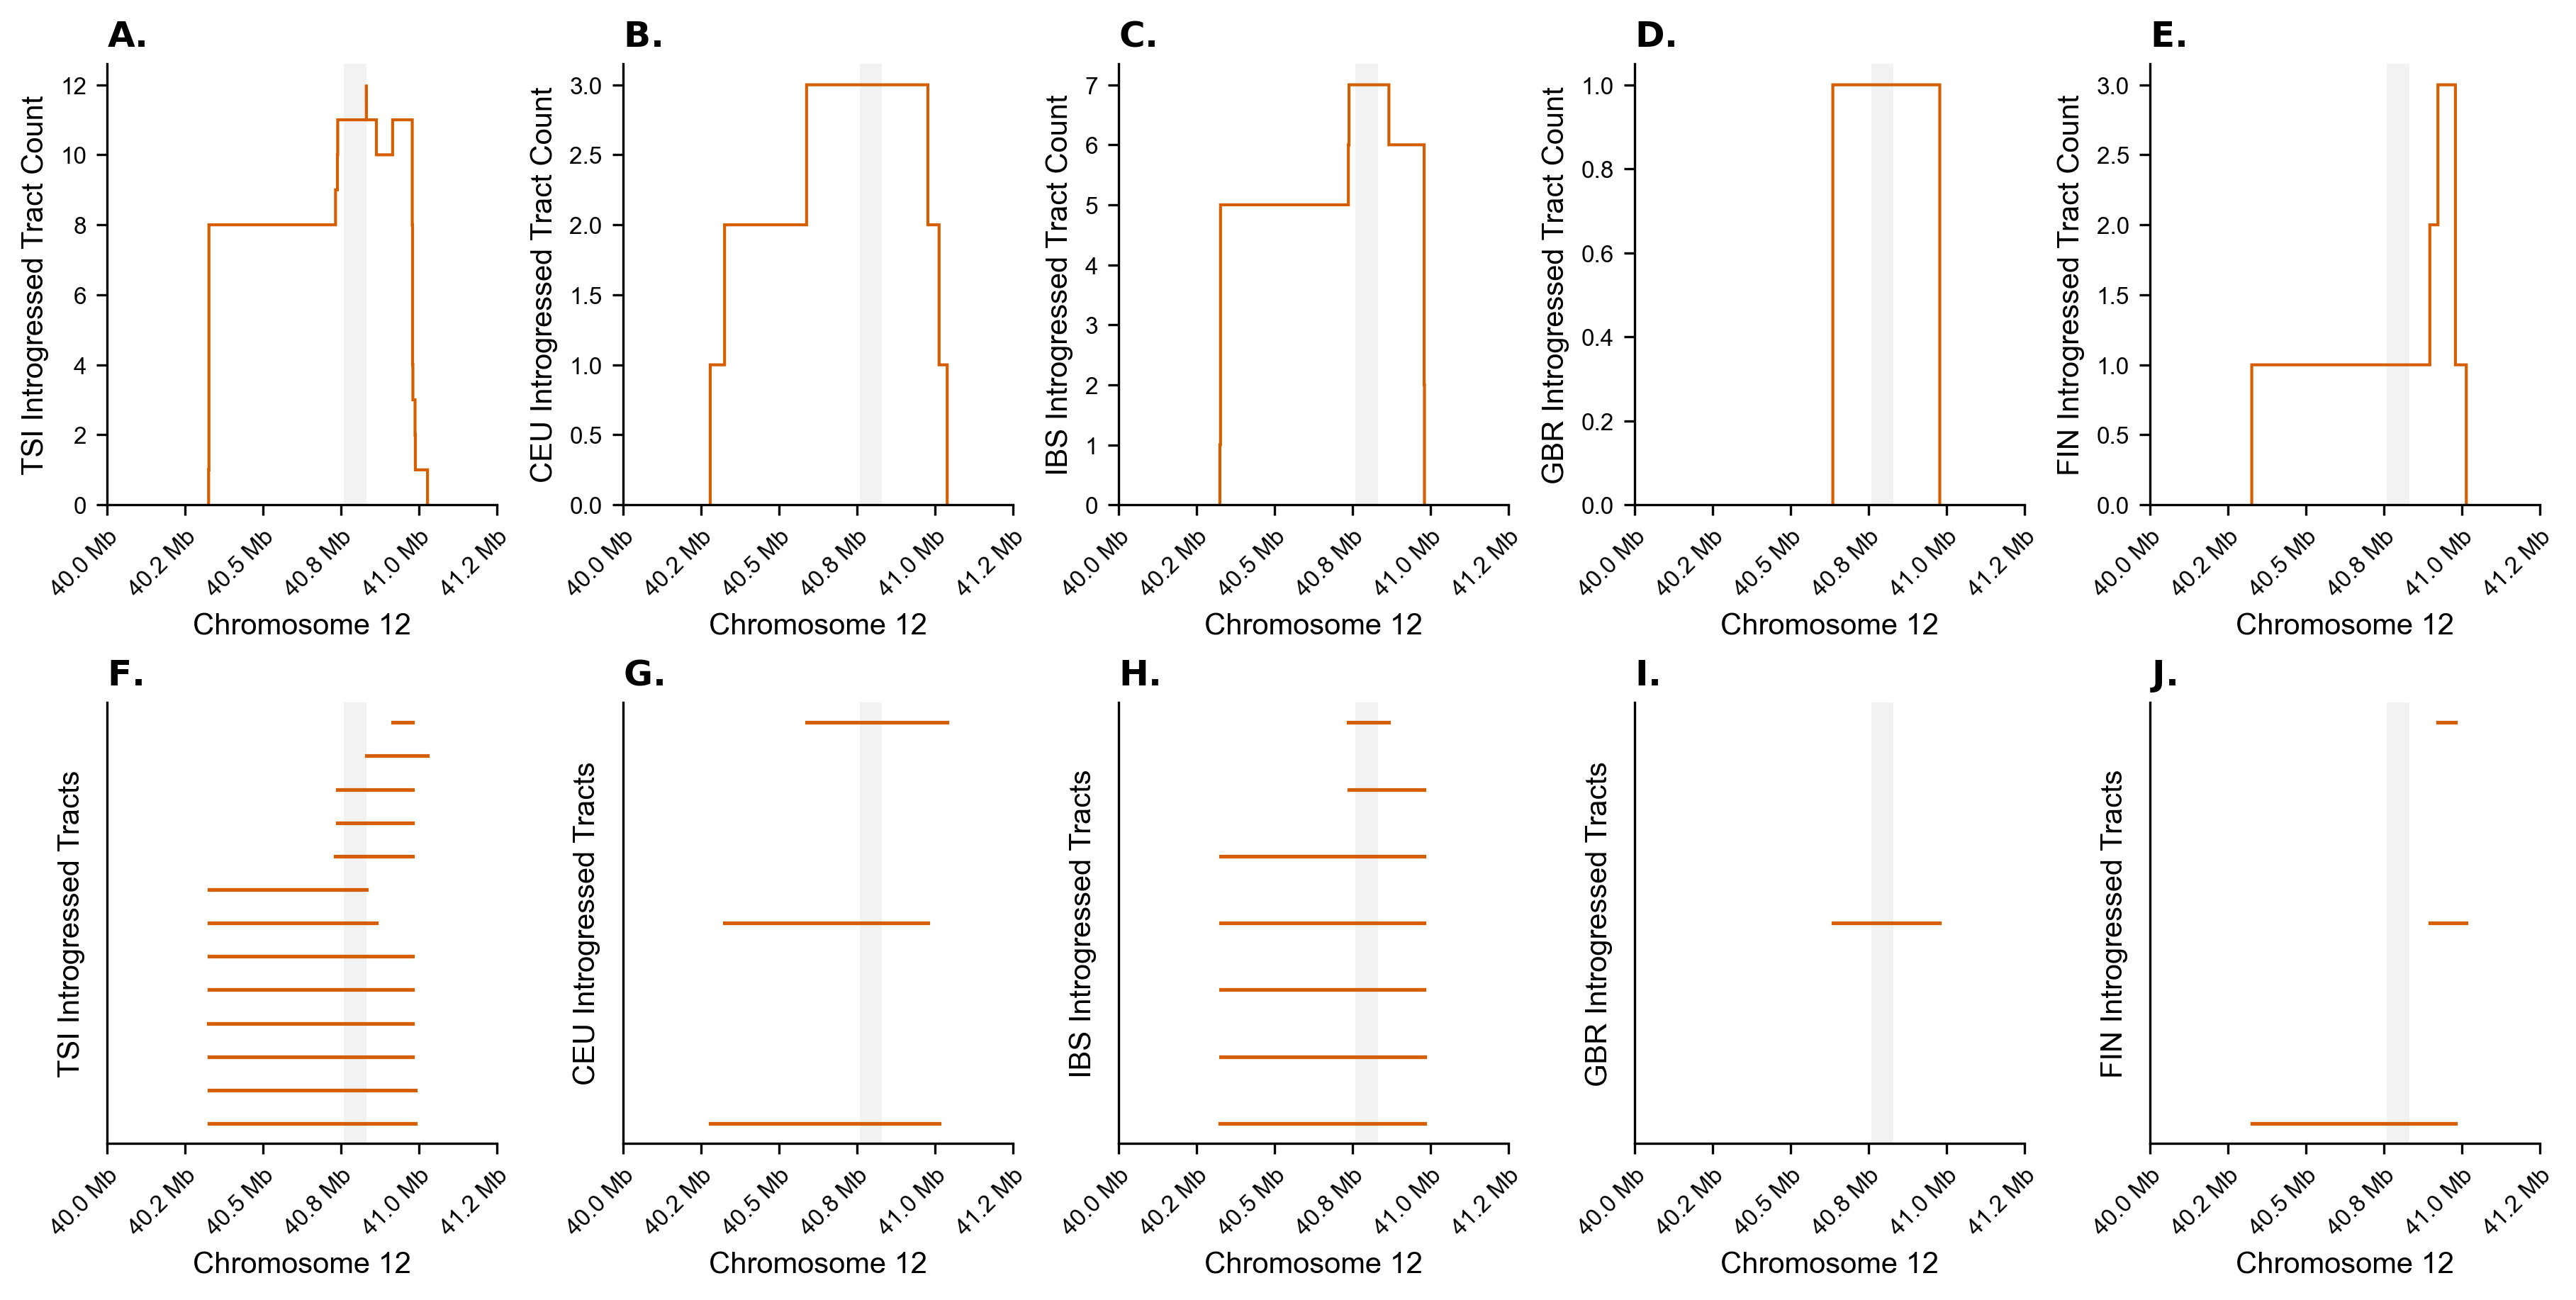

In [17]:
# Plot the muc19 introgressed tract info for eur populations.
af.plot_tract_info_per_super_population(muc19_tracts_df, 'EUR')

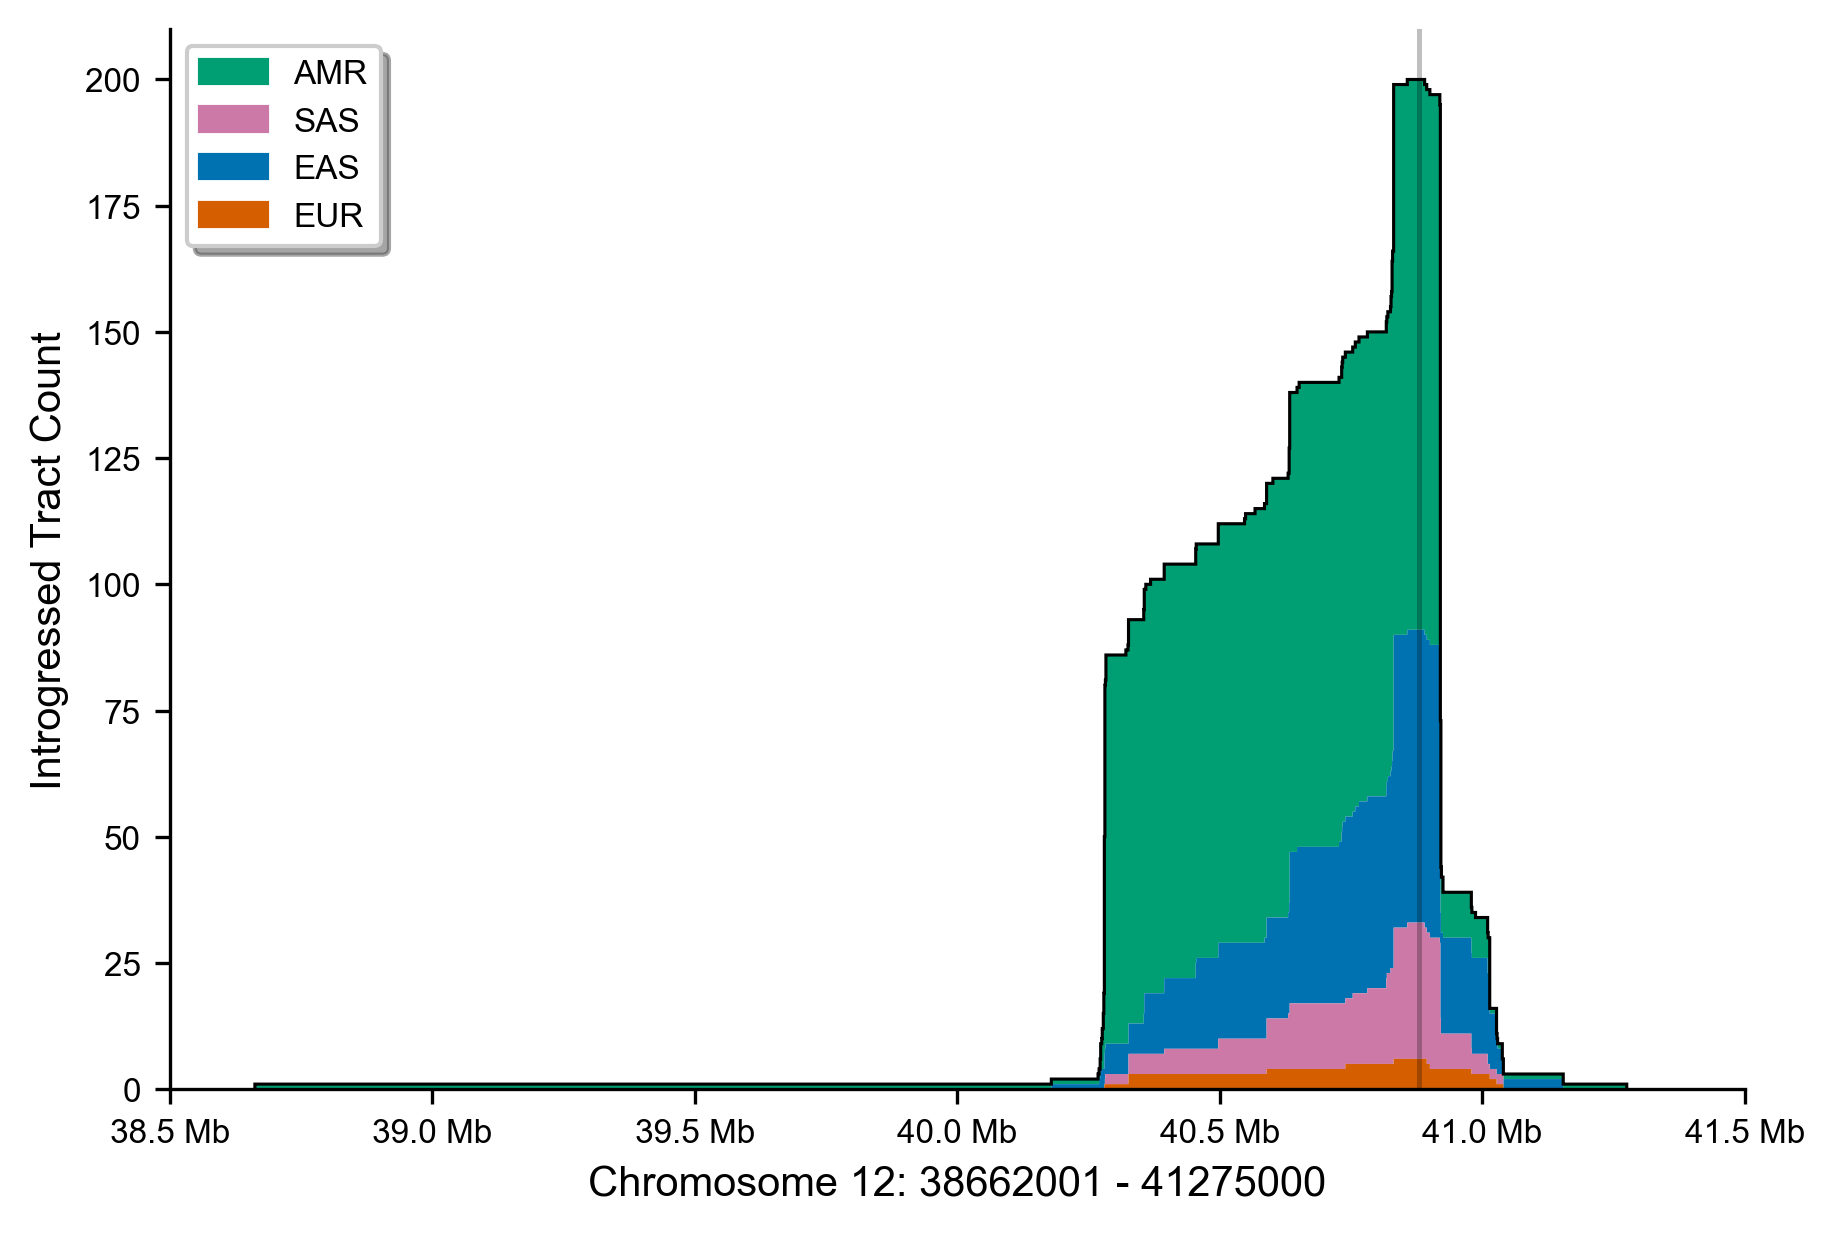

In [18]:
# Plot the introgressed tract density for the short read repeat region.
af.plot_tgp_sr_rr_tract_density(sr_rr_tracts_df, sr_rr_tract_pos, sr_rr_tract_counts)